# Estadistica Aplicada

Sesion 12 - 11 septiembre

Jesus Adrian Cordero Hernandez 1952778

Gpo 41

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [4]:
ejercicio_km = pd.read_excel('ejercicio_km.xlsx')

In [5]:
ejercicio_km.head()

,Imdividuo,Tiempo,Evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [6]:
km1= KaplanMeierFitter().fit(ejercicio_km['Tiempo'],ejercicio_km['Evento'])

In [8]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


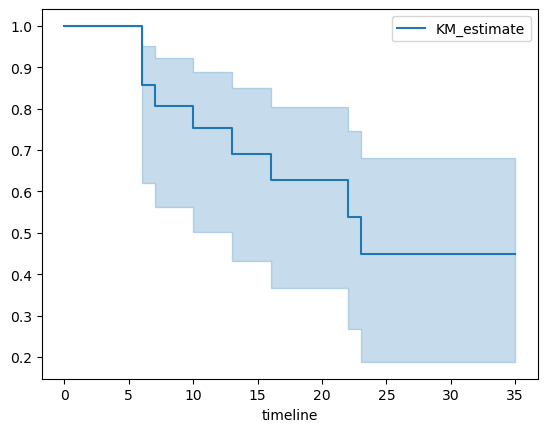

In [12]:
km1.plot_survival_function();

In [13]:
km1.median_survival_time_

23.0

Significa que en el tiempo 23 a la mitad de los individuos les ha ocurrido el evento


In [14]:
relacion= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [15]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


Los datos de "relacion" corresponden al tiempo de supervivencia de una relacion, el timpo que pasa desde que inicia la relacion hasta que termina. El tiempo etsa medido en semanas y esta en la columna "t". En la variable estado 1 significa que el evento ocurrio, y 0 que hay censura. En la variable tratamiento 1 es "detallista" y 0 "no detallista". En esta base detallista es quien hizo por lo menos un regalo semanal a su pareja (flores,peluches,paleta, etc).

In [16]:
km_all= KaplanMeierFitter().fit(relacion['t'],relacion['estado'])

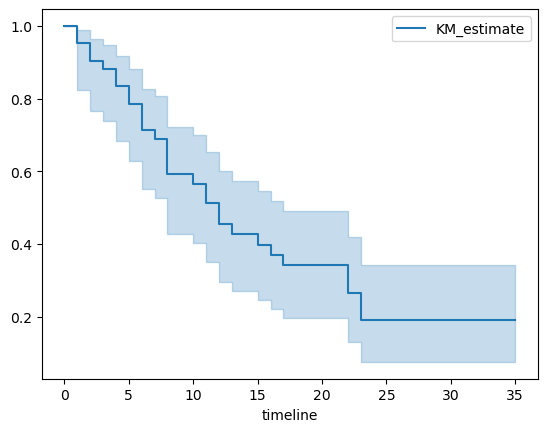

In [17]:
km_all.plot_survival_function();

In [18]:
km_all.median_survival_time_

12.0

En la semana 12 la mitad de las relaciones han terminado

In [20]:
detallistas= relacion.query('tratamiento==1')
no_deta = relacion.query('tratamiento==0')

In [21]:
km_deta = KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_nodeta= KaplanMeierFitter().fit(no_deta['t'],no_deta['estado'])

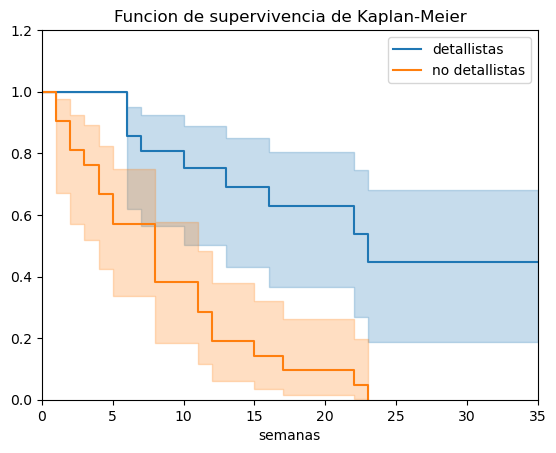

In [24]:
km_deta.plot_survival_function(label='detallistas')
km_nodeta.plot_survival_function(label='no detallistas')
plt.xlim(0,35)
plt.ylim(0,1.2)
plt.xlabel('semanas')
plt.title('Funcion de supervivencia de Kaplan-Meier');

Prueba de hipotesis (log rank test)\
$Ho: S(1)=S(2)$ funciones de supervivencia iguales\
$Ha: S(1)\neq S(2)$ funciones de supervivencia distintas

In [26]:
LRT = logrank_test(detallistas['t'],no_deta['t'],detallistas['estado'],no_deta['estado'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [27]:
LRT.p_value.round(2)

0.0

Con un $\alpha=.05$ Rechazamos Ho, las funciones de supervivencia son distintas, la relacion de los detallistas duran mas que la relacion de los no detallistas. La mitad de las relaciones de los no detallistas duran menos de 8 semanas vs la mitad de las relaciones de los detallistas duran 23 semanas

In [28]:
km_deta.median_survival_time_

23.0

In [29]:
km_nodeta.median_survival_time_

8.0